In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/.DS_Store
../input/Electric_Vehicle_Population_Data.csv


In [2]:
import pandas as pd
df = pd.read_csv('../input/Electric_Vehicle_Population_Data.csv')

In [3]:
df = df
intended_df_size_in_MB = 256
factor = intended_df_size_in_MB*(2**20)/df.memory_usage(index=True).sum()
if int(factor) > 0:
    df = pd.concat([df]*int(factor), ignore_index=True)
else:
    rowCount = int(df.shape[0]*factor)
    df = df[0:rowCount]
df = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956266 entries, 0 to 1956265
Data columns (total 17 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   VIN (1-10)                                         object 
 1   County                                             object 
 2   City                                               object 
 3   State                                              object 
 4   Postal Code                                        float64
 5   Model Year                                         int64  
 6   Make                                               object 
 7   Model                                              object 
 8   Electric Vehicle Type                              object 
 9   Clean Alternative Fuel Vehicle (CAFV) Eligibility  object 
 10  Electric Range                                     int64  
 11  Base MSRP                                         

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset
print(df.info())

   VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA      98103.0        2020  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA      98011.0        2022     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA      98908.0        2023     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA      98034.0        2018    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA      98501.0        2018      BMW   

            Model                   Electric Vehicle Type  \
0            KONA          Battery Electric Vehicle (BEV)   
1  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
2  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
3         MODEL 3          Battery Electric Vehicle (BEV)   
4              I3  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             258   
1             Not eligible d

<AxesSubplot:>

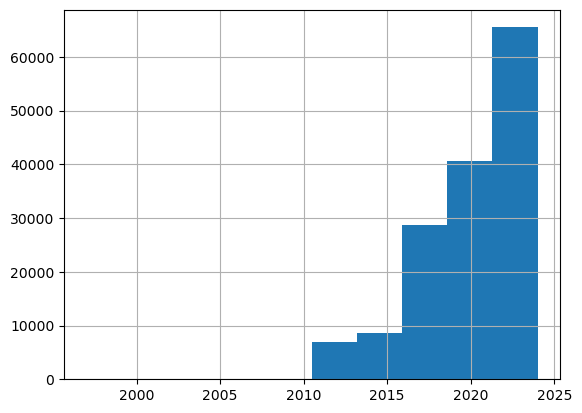

In [4]:
df['Model Year'].hist()

In [5]:
avg_range = df['Electric Range'].mean()
median_price = df['Base MSRP'].median()

In [6]:
ev_2020 = df[df['Model Year'] == 2020]

In [7]:
groupby_make = df.groupby('Make')['Electric Range'].mean()

In [8]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])
